# Individual output classification

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import learning
import pandas as pd
from IPython.core import display as ICD
from sklearn.externals import joblib
pd.options.display.max_columns = 999

base_dftrain = learning.get_base_data(2014)
base_dftest = learning.get_base_data(2015)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
mydf = base_dftrain.drop(['GameNum', 'DateTimestamp', 'Num', 'GNum', 'O_Shorthanded'], 1)
ICD.display(mydf.describe())

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,O_Goals,O_Assists,O_Blocks,O_Shots,TS_Goals,TS_Assists,TS_PlusMinus,TS_SoG,TS_Shot%,TS_ATOI,TS_iCF,TS_SATF,TS_SATA,TS_ZSO,TS_HIT,TS_BLK,TM_Goals,Opp_GA,Opp_SA,Opp_SV%
count,22138.000000,22138.000000,22096.000000,22138.000000,22044.000000,22044.000000,22138.000000,22044.000000,22138.000000,22044.000000,22044.000000,22044.000000,22044.000000,22044.000000,22044.000000,22044.000000,22138.000000,21958.000000,21958.000000,21958.000000
mean,0.146716,0.250565,0.811142,1.673277,0.148825,0.256622,0.230463,1.651447,0.082245,990.689450,3.080143,15.392468,14.840367,5.743329,1.377901,0.791149,2.752263,2.367907,27.876369,0.914167
std,0.392104,0.511207,1.117065,1.509899,0.117126,0.156606,9.625513,0.742941,0.051778,242.391776,1.326390,5.151254,4.024355,2.338308,0.836522,0.586295,0.315567,0.389125,2.725009,0.020413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.000000,0.000000,0.000000,171.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.822222,0.000000,3.000000,0.500000
25%,0.000000,0.000000,NaN,1.000000,NaN,NaN,-5.000000,NaN,0.045235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,NaN
50%,0.000000,0.000000,NaN,1.000000,NaN,NaN,0.000000,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.800000,NaN,NaN,NaN
75%,0.000000,0.000000,NaN,2.000000,NaN,NaN,6.000000,NaN,0.116667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.959184,NaN,NaN,NaN
max,4.000000,5.000000,15.000000,10.000000,1.000000,1.000000,41.000000,8.000000,1.000000,1777.571429,10.402778,32.000000,28.955556,14.000000,9.000000,3.635135,3.313433,5.000000,37.000000,1.000000


In [9]:
h = .02  # step size in the mesh

classifiers = [    
    SVC(),
    SVC(C=2),
    SVC(C=1),
    MLPClassifier(solver='lbfgs', alpha=.0001, random_state=1),
    MLPClassifier(solver='lbfgs', alpha=.001, random_state=1),
    MLPClassifier(solver='lbfgs', alpha=.0005, random_state=1),
    MLPClassifier(solver='lbfgs', alpha=.00005, random_state=1),
    MLPClassifier(solver='lbfgs', alpha=.00001, random_state=1),
    KNeighborsClassifier(3),
    KNeighborsClassifier(5),
    KNeighborsClassifier(7),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    RandomForestClassifier(max_depth=10, n_estimators=30, max_features=1),
    AdaBoostClassifier(),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB()]

def tryclfs(output, clfs):
    print(output)
    print()
    maxscore = 0
    dftrain, Xtrain, ytrain = learning.prepare_base_data(base_dftrain, output)
    for clf in clfs:
        clf.fit(Xtrain, ytrain)
        true, pred, score = learning.score(base_dftest, modelsd={output: clf})
        score = np.mean(pred) / np.mean(true)
        print(clf)
        print(score)
        print()
        if(score > maxscore):
            chosenclf = clf
            maxscore = score
    return chosenclf

clfgoals = tryclfs("Goals", classifiers)
clfassists = tryclfs("Assists", classifiers)
clfshots = tryclfs("Shots", classifiers)
clfblocks = tryclfs("Blocks", classifiers)

Goals

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.12030075188

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.12030075188

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.12030075188

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_moment

NameError: name 'clfgoalsals' is not defined

In [11]:
clfs = {"Goals": clfgoals, "Assists": clfassists, "Shots": clfshots, "Blocks": clfblocks}

# print(clfgoals)
# print(clfassists)
# print(clfshots)
# print(clfblocks)

true, pred, score = learning.score(base_dftest, modelsd={"Goals": clfgoals, "Assists": clfassists, "Shots": clfshots, "Blocks": clfblocks})
score = np.mean(pred) / np.mean(true)
print()
print('Overall score:')
print(score)


Overall score:
0.354810861717


# Regression on individual classifier outputs

In [10]:
dftest = learning.get_base_data(2014)

OUTPUTS = ["Goals", "Assists", "Shots", "Blocks"]
WEIGHTS = {"Goals": 3, "Assists": 2, "Shots": .5, "Blocks": .5}

def getpoints(clf, X, y, weight):
    probs = clf.predict_proba(X)
    e = np.sum(np.array(range(probs.shape[1])) * probs, axis=1)
    epoints = e * weight
    apoints = y * weight
    return epoints.reshape(-1, 1), apoints.reshape(-1, 1)

dftrain, _, _ = learning.prepare_base_data(dftest, "Goals")

for output, clf in clfs.items():
    _, X, y = learning.prepare_base_data(dftest, output)
    epoints, apoints = getpoints(clf, X, y, WEIGHTS[output])
    dftrain[output + "Exp"] = epoints
    dftrain[output + "Act"] = apoints
    
cols = [x+"Exp" for x in OUTPUTS]
acols = [x+"Act" for x in OUTPUTS]
dftrain['Exp'] = dftrain[cols].sum(axis=1)
dftrain['Act'] = dftrain[acols].sum(axis=1)
dftrain = dftrain.sort_values('Act', ascending=False)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

Xtrainexp = dftrain[cols]
ytrainact = dftrain['Act']

regr = LinearRegression()
regr.fit(Xtrainexp, ytrainact)
print(regr.score(Xtrainexp, ytrainact))
predexp = regr.predict(Xtrainexp)

dftrain['RegrExp'] = predexp

regr = MLPRegressor(hidden_layer_sizes=(100,))
regr.fit(Xtrainexp, ytrainact)
print(regr.score(Xtrainexp, ytrainact))
predmlp = regr.predict(Xtrainexp)

dftrain['MLPExp'] = predmlp

0.00206771013399
0.0111020986115


In [19]:
import learning
true, pred, softscore = learning.clfscore(base_dftest, {"Goals": clfgoals, "Assists": clfassists, "Shots": clfshots, "Blocks": clfblocks}, regr)
print(score)

47.4310344828


In [16]:
regr.coefs_

[array([[  3.44906056e-01,  -3.86304492e-02,   4.33894946e-01,
           1.77551429e-01,  -2.22354535e-10,   3.74827073e-01,
          -1.74100339e-10,   4.69238493e-01,  -7.84178471e-01,
          -2.81684685e-07,  -9.29779262e-10,  -1.88277232e-01,
          -5.66926256e-02,  -1.95163301e-30,   7.24168521e-02,
           1.35700100e-01,   1.42747381e-02,   1.37217268e-02,
          -2.12366261e-01,   1.16294170e-01,   2.70432604e-01,
           2.01586906e-02,   2.05709270e-01,   2.98783454e-01,
           3.80925055e-01,   3.04288528e-01,   1.88480494e-01,
          -1.50134017e-08,   2.20932257e-01,  -8.79088647e-02],
        [ -2.72229314e-02,   2.99903628e-01,  -3.41263644e-01,
           3.94699356e-01,  -5.21054951e-12,   1.50646576e-01,
          -3.29220518e-12,  -2.64836976e-01,  -2.71618612e-02,
           1.77478734e-26,  -1.04263235e-05,   2.13863068e-01,
          -1.32926298e-01,   2.25223558e-24,   4.27492179e-01,
          -2.73345281e-01,  -1.75378544e-01,  -1.65049

In [15]:
h = .02  # step size in the mesh

classifiers = [    
    GaussianNB()]

def tryclfs(output, clfs):
    print(output)
    minscore = 10000
    dftrain, Xtrain, ytrain = learning.prepare_base_data(base_dftrain, output)
    ytrain[ytrain > 0] = 1
    for clf in clfs:
        clf.fit(Xtrain, ytrain)
        true, pred, score = learning.score(base_dftest, modelsd={output: clf})
        print(clf)
        print(score)
        print()
        if(score<minscore):
            chosenclf = clf
            minscore = score
    return chosenclf

clfgoals = tryclfs("Goals", classifiers)
clfassists = tryclfs("Assists", classifiers)
clfshots = tryclfs("Shots", classifiers)
clfblocks = tryclfs("Blocks", classifiers)

clfs = {"Goals": clfgoals, "Assists": clfassists, "Shots": clfshots, "Blocks": clfblocks}

print(clfgoals)
print(clfassists)
print(clfshots)
print(clfblocks)

true, pred, score = learning.score(base_dftest, modelsd={"Goals": clfgoals, "Assists": clfassists, "Shots": clfshots, "Blocks": clfblocks})
print(score)

Goals


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


GaussianNB(priors=None)
27.0344827586

Assists


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


GaussianNB(priors=None)
23.2413793103

Shots


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


GaussianNB(priors=None)
15.5114942529

Blocks


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


GaussianNB(priors=None)
11.1896551724

GaussianNB(priors=None)
GaussianNB(priors=None)
GaussianNB(priors=None)
GaussianNB(priors=None)
49.7068965517


In [19]:
from sklearn.metrics import roc_curve, auc


_, xm, ytrue = learning.prepare_base_data(base_dftest, "Goals")
ytrue[ytrue > 0] = 1
    
fpr, tpr, _ = roc_curve(ytrue, clfgoals.predict(xm))

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


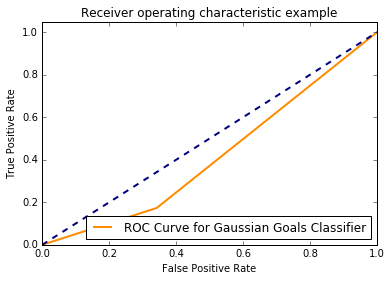

In [23]:
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC Curve for Gaussian Goals Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()